In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv", nrows = 550000)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 8 columns):
key                  550000 non-null object
fare_amount          550000 non-null float64
pickup_datetime      550000 non-null object
pickup_longitude     550000 non-null float64
pickup_latitude      550000 non-null float64
dropoff_longitude    549994 non-null float64
dropoff_latitude     549994 non-null float64
passenger_count      550000 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 33.6+ MB


In [4]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,550000.000000,550000.000000,550000.000000,549994.000000,549994.000000,550000.000000
mean,11.348953,-72.527701,39.922421,-72.524337,39.917940,1.683707
std,9.883326,12.545991,7.950921,11.692485,7.297479,1.307607
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-2559.748913,0.000000
25%,6.000000,-73.992043,40.734942,-73.991390,40.734060,1.000000
50%,8.500000,-73.981790,40.752681,-73.980141,40.753135,1.000000
75%,12.500000,-73.967108,40.767092,-73.963602,40.768124,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [5]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    6
dropoff_latitude     6
passenger_count      0
dtype: int64

In [6]:
df = df.dropna()
df.shape

(549994, 8)

In [7]:
df = df[df["fare_amount"]>0]
df.shape

(549954, 8)

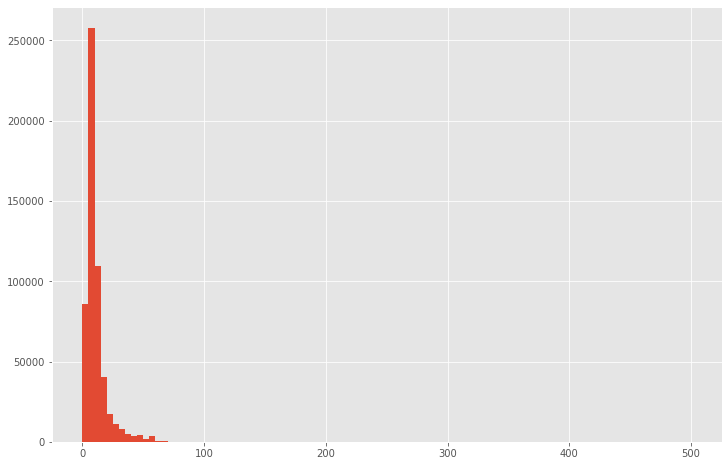

In [8]:
plt.figure(figsize = (12,8))
plt.hist(df["fare_amount"], bins = 100)
plt.show()

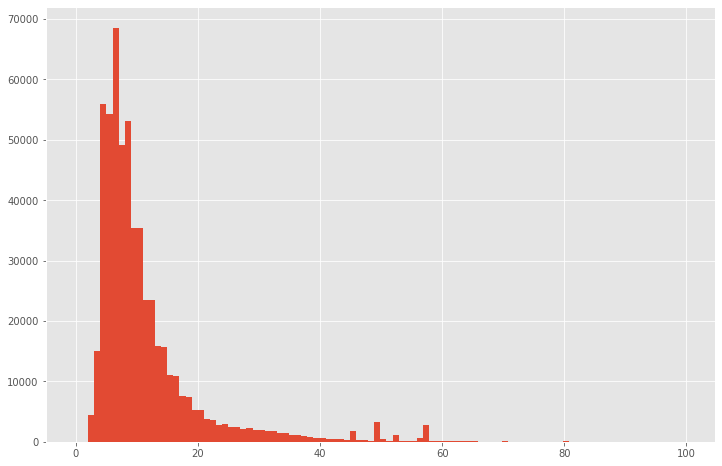

In [9]:
df = df[df["fare_amount"]<100]
plt.figure(figsize = (12,8))
plt.hist(df["fare_amount"], bins = 100)
plt.show()

In [10]:
def outlier_iqr(df, columns=None):
    if columns == None:
        columns = df.columns

    for col in columns:
        q1 = df[col].describe()['25%']
        q3 = df[col].describe()['75%']
        #四分位範囲
        iqr = q3 - q1 
        
        outlier_min = q1 - iqr * 1.5
        outlier_max = q3 + iqr * 1.5

        # 範囲から外れている値を除く
        df = df[(df[col] >= outlier_min) & (df[col] <= outlier_max)]
        
    return df

In [11]:
print("before", df.shape)
df = outlier_iqr(df, columns = ["fare_amount"])
print("after", df.shape)

before (549707, 8)
after (502410, 8)


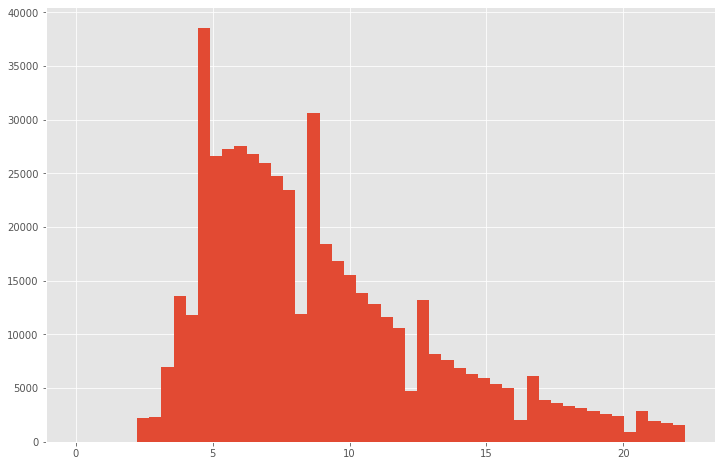

In [12]:
df = df[df["fare_amount"]<100]
plt.figure(figsize = (12,8))
plt.hist(df["fare_amount"], bins = 50)
plt.show()

In [13]:
print('before', df.shape)
df = df[(df['pickup_longitude'] > -75) & (df['pickup_longitude'] < -73)]
df = df[(df['pickup_latitude'] > 40) & (df['pickup_latitude'] < 42)]
df = df[(df['dropoff_longitude'] > -75) & (df['dropoff_longitude'] < -73)]
df = df[(df['dropoff_latitude'] > 40) & (df['dropoff_latitude'] < 42)]
print('after', df.shape)

before (502410, 8)
after (492133, 8)


In [14]:
df["passenger_count"].value_counts()

1    341337
2     72056
5     34752
3     21456
4     10411
6     10253
0      1868
Name: passenger_count, dtype: int64

In [15]:
print("before", df.shape)
df = df[df["passenger_count"]>0]
print("after", df.shape)

before (492133, 8)
after (490265, 8)


In [16]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,490265.000000,490265.000000,490265.000000,490265.000000,490265.000000,490265.000000
mean,8.933894,-73.979709,40.752227,-73.978072,40.752539,1.686310
std,4.139031,0.028164,0.027131,0.028387,0.028941,1.303497
min,0.010000,-74.968142,40.052722,-74.964263,40.041180,1.000000
25%,5.700000,-73.992532,40.737282,-73.991863,40.737189,1.000000
50%,8.000000,-73.982429,40.753330,-73.981329,40.753990,1.000000
75%,11.000000,-73.970177,40.766867,-73.967958,40.767942,2.000000
max,22.250000,-73.036247,41.800252,-73.029770,41.923820,6.000000


In [17]:
def calculation_distance(x_1, y_1, x_2, y_2):
    # 赤道半径 (km)
    R = 6371
    # Radian角に変換
    _x1, _y1, _x2, _y2  = map(np.radians, [x_1, y_1, x_2, y_2])
    
    delta_x = _x2 - _x1
    delta_y = _y2 - _y1
    
    # 距離を計算
    a = np.sin(delta_y/2.0)**2 + np.cos(_y1) * np.cos(_y2) * np.sin(delta_x/2.0)**2
    return 2 * R * np.arcsin(np.sqrt(a))

def calculation_azimuth(x_1, y_1, x_2, y_2):
    # Radian角に修正
    _x1, _y1, _x2, _y2 = map(np.radians, [x_1, y_1, x_2, y_2])
    
    delta_x = _x2 - _x1
    _y = np.sin(delta_x)
    _x = np.cos(_y1) * np.tan(_y2) - np.sin(_y1) * np.cos(delta_x)

    psi = np.rad2deg(np.arctan2(_y, _x))
    
    return np.where(psi < 0, 360 + psi, psi)

In [18]:
df ["distance"] = calculation_distance(df["pickup_longitude"],
                                      df["pickup_latitude"],
                                      df["dropoff_longitude"],
                                      df["dropoff_latitude"])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [19]:
df["azimuth"] = calculation_azimuth(df["pickup_longitude"],
                                    df["pickup_latitude"],
                                    df["dropoff_longitude"],
                                    df["dropoff_latitude"])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,azimuth
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,167.240469
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,21.498365
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,211.033211
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,352.327836
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,28.802783


In [20]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"] ,format = "%Y-%m-%d %H:%M:%S UTC")
df["hour"] = df["pickup_datetime"].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['year'] = df['pickup_datetime'].dt.year

df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,azimuth,hour,day,month,dayofweek,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,167.240469,17,15,6,0,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,21.498365,16,5,1,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,211.033211,0,18,8,3,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,352.327836,4,21,4,5,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,28.802783,7,9,3,1,2010


In [22]:
from sklearn.model_selection import train_test_split 

In [23]:
x = df.drop(columns = ["key", "fare_amount", "pickup_datetime"])
y = df["fare_amount"]

print(x.shape)
print(y.shape)

(490265, 12)
(490265,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0 )


In [25]:
import xgboost as xgb

In [26]:
params = {
    'silent': 1,
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': 0.1,
    'tree_method': 'exact',
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'predictor': 'cpu_predictor'
}

In [27]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
model = xgb.train(params=params,
                  dtrain=dtrain,
                  num_boost_round=1000,
                  early_stopping_rounds=5,
                  evals=[(dtest, 'test')])

C:\Users\nkmur\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	test-rmse:8.5126
Will train until test-rmse hasn't improved in 5 rounds.
[1]	test-rmse:7.71671
[2]	test-rmse:7.006
[3]	test-rmse:6.37134
[4]	test-rmse:5.80673
[5]	test-rmse:5.30462
[6]	test-rmse:4.85977
[7]	test-rmse:4.4662
[8]	test-rmse:4.11941
[9]	test-rmse:3.81447
[10]	test-rmse:3.54791
[11]	test-rmse:3.31563
[12]	test-rmse:3.1137
[13]	test-rmse:2.93828
[14]	test-rmse:2.78763
[15]	test-rmse:2.65765
[16]	test-rmse:2.5462
[17]	test-rmse:2.45198
[18]	test-rmse:2.37125
[19]	test-rmse:2.30268
[20]	test-rmse:2.24448
[21]	test-rmse:2.19453
[22]	test-rmse:2.15356
[23]	test-rmse:2.11894
[24]	test-rmse:2.08824
[25]	test-rmse:2.06296
[26]	test-rmse:2.04176
[27]	test-rmse:2.02316
[28]	test-rmse:2.00831
[29]	test-rmse:1.9952
[30]	test-rmse:1.98213
[31]	test-rmse:1.97198
[32]	test-rmse:1.9628
[33]	test-rmse:1.95552
[34]	test-rmse:1.9476
[35]	test-rmse:1.94152
[36]	test-rmse:1.93574
[37]	test-rmse:1.93081
[38]	test-rmse:1.92526
[39]	test-rmse:1.92135
[40]	test-rmse:1.91784
[41]	test-rmse:1.914

In [28]:
gridsearch_params = [
    [max_depth, eta]
    for max_depth in [6, 7, 8]
    for eta in [0.1, 0.05, 0.01]
]
gridsearch_params

[[6, 0.1],
 [6, 0.05],
 [6, 0.01],
 [7, 0.1],
 [7, 0.05],
 [7, 0.01],
 [8, 0.1],
 [8, 0.05],
 [8, 0.01]]

In [29]:
cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=10,
        seed=0,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=5
    )

In [41]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,8.505169,0.003982,8.505336,0.016730
1,7.711945,0.003571,7.712347,0.015795
2,7.003414,0.003236,7.004034,0.014974
3,6.371519,0.003023,6.372406,0.014208
4,5.808875,0.002737,5.810133,0.013708
5,5.308595,0.002507,5.310254,0.013047
6,4.865239,0.002188,4.867328,0.012672
7,4.473148,0.002027,4.475643,0.012245
8,4.127549,0.002024,4.130515,0.011843
9,3.823821,0.002052,3.827310,0.011533


In [ ]:
prediction = model.predict(xgb.DMatrix(X_test), 
                           ntree_limit=model.best_ntree_limit)

plt.figure(figsize=(12, 12))
plt.scatter(y_test[:1000], prediction[:1000], alpha=0.2)
plt.show()